## Customer Churn Prediction

In [1]:
import pandas as pd
churn = pd.read_csv('Churn_Modelling.csv')

In [2]:
churn

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
churn.shape

(10000, 14)

In [4]:
churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
churn.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [6]:
churn = churn.drop(['RowNumber','CustomerId','Surname' ], axis=1)
churn

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [7]:
churn['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [8]:
churn = pd.get_dummies(churn, drop_first=True)
churn.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [9]:
churn['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [10]:
X = churn.drop('Exited', axis=1)
y = churn['Exited']

In [11]:
from imblearn.over_sampling import SMOTE

x_res,y_res = SMOTE().fit_resample(X, y)

y_res.value_counts()


Exited
1    7963
0    7963
Name: count, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.20, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

log.fit(x_train, y_train)
pred1 = log.predict(x_test)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred1)

0.7749529190207156

## SVC

In [16]:
from sklearn import svm
svm = svm.SVC()

svm.fit(x_train, y_train)

SVC()

In [17]:
pred2 = svm.predict(x_test)

accuracy_score(y_test, pred2)

0.8405524168236033

## KNeighbour Classifier

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(x_train, y_train)

KNeighborsClassifier()

In [19]:
pred3 = knn.predict(x_test)

accuracy_score(y_test, pred3)

0.8107344632768362

## Decision Tree Classifier

In [20]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [21]:
pred4 = dt.predict(x_test)

accuracy_score(y_test, pred4)

0.8145009416195856

## Random Forest Classification

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(x_train, y_train)

RandomForestClassifier()

In [23]:
pred5 = rf.predict(x_test)

accuracy_score(y_test, pred5)

0.8631512868801005

## Gradient Boosting Classifier

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

gcb = GradientBoostingClassifier()

gcb.fit(x_train, y_train)


GradientBoostingClassifier()

In [25]:
pred6 = gcb.predict(x_test)

accuracy_score(y_test, pred6)

0.8377275580665411

## Checking

In [26]:
final_score = pd.DataFrame( {
    'Models' : ['LR', 'SVC', 'KNN', 'DT', 'RF', 'GBC'],
    'ACC': [accuracy_score(y_test, pred1),
            accuracy_score(y_test, pred2),
            accuracy_score(y_test, pred3),
            accuracy_score(y_test, pred4),
            accuracy_score(y_test, pred5),
            accuracy_score(y_test, pred6)]
} )

final_score

,Models,ACC
0,LR,0.774953
1,SVC,0.840552
2,KNN,0.810734
3,DT,0.814501
4,RF,0.863151
5,GBC,0.837728


<Axes: xlabel='Models', ylabel='ACC'>

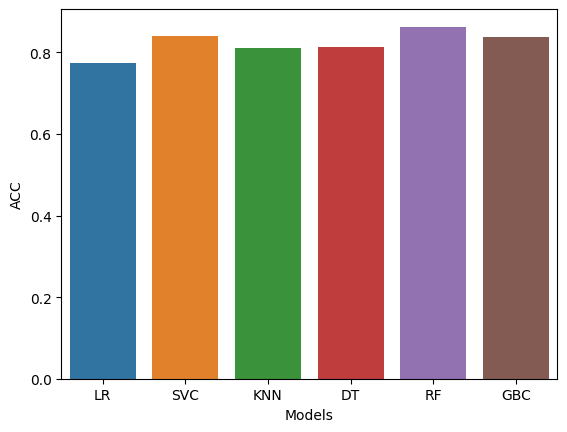

In [27]:
import seaborn as sns

sns.barplot(x=final_score['Models'], y=final_score['ACC'], )

## SAVING

In [28]:
x_res = sc.fit_transform(x_res)

rf.fit(x_res, y_res)

RandomForestClassifier()

In [29]:
import joblib

joblib.dump(rf, 'Customer_churn_Prediction_model')

['Customer_churn_Prediction_model']

In [30]:
m = joblib.load('Customer_churn_Prediction_model')

m.predict([[123, 0, 5, 6, 7, 1, 75, 52, 89, 1, 0 ]])

array([1], dtype=int64)